In [84]:
def is_column_equal(c):
    c1, c2 = c
    if c1.dtype != c2.dtype:
        raise TypeError, "Columns must be of equal type"
    
    if c1.dtype == object and c2.dtype == object:
        print c1, c2
        print (c1==c2).mean()
        return np.all(c1 == c2)
    else:
        nan_ind = np.isnan(c1)
        return np.all(nan_ind == np.isnan(c2)) and np.all(c1[~nan_ind] == c2[~nan_ind])

In [73]:
def is_ndarray_equal(x1, x2):
    if x1.shape != x2.shape:
        return False
    return np.all(map(is_column_equal, zip(x1, x2)))

def is_array_equal(x1, x2):
    if isinstance(x1, np.ndarray) and isinstance(x2, np.ndarray):
        return is_ndarray_equal(x1, x2)
    if isinstance(x1, pd.DataFrame) and isinstance(x2, pd.DataFrame) \
        or isinstance(x1, pd.Series) and isinstance(x2, pd.Series):
        return is_ndarray_equal(x1.values.T, x2.values.T)
        
    raise TypeError, "Expected np.ndarray or pd.DataFrame"
    

In [78]:
import numpy as np
import pandas as pd
df = pd.read_csv('train.csv')

In [111]:
import numpy 
a = df.values
b = a
((a == b) | (numpy.isnan(a) & numpy.isnan(b))).all()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [57]:
d = df[['Age', 'Fare']]
d[d.Age > 20] = np.nan
print is_array_equal(d.values, d.values)


True


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [153]:
l = [1, 2]
apply(l, f)

TypeError: apply() arg 2 expected sequence, found function

In [203]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

fraction of (P(Survived|Ticket) = 0.5)  0.238806


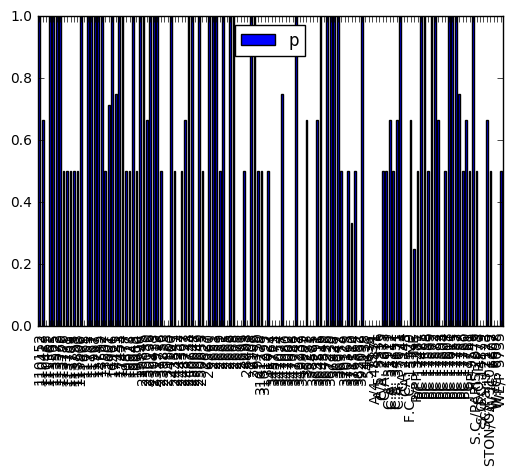

In [279]:
col = 'Ticket'
df1 = df[~pd.isnull(df.Ticket)]
cg = df1.groupby(col)
x = filter(lambda x:len(x[1]) > 1, list(cg))
d = pd.DataFrame(map(lambda x:(x[0], x[1].Survived.mean()), x))
print "fraction of (P(Survived|Ticket) = 0.5)  %f" %(d.iloc[:, 1] == 0.5).mean()
d.index = d.iloc[:, 0].values
d = d.drop(0, axis = 1)
#print d
d.columns = ['p']
d.plot(kind='bar')
import matplotlib.pyplot as plt
plt.show()

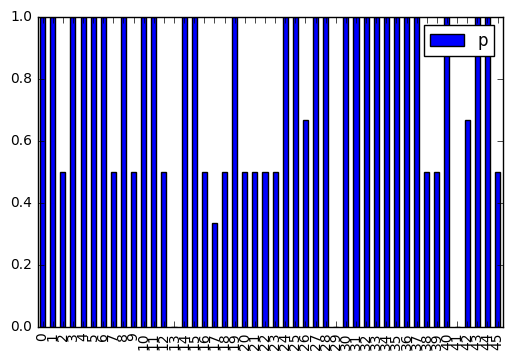

In [211]:
cg = df.groupby('Cabin')
x = filter(lambda x:len(x[1]) > 1, list(cg))
d = pd.DataFrame(map(lambda x:(x[0], x[1].Survived.mean()), x))
d.columns = ['Cabin', 'p']
d.plot(kind='bar')
import matplotlib.pyplot as plt
plt.show()

In [208]:
from sklearn.feature_selection import chi2

In [269]:
s = set(v[:, 0])
mapping = dict(zip(s, range(len(s))))
#map(mapping.get, v[:, 0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [274]:
col = 'Ticket'
v = df[~pd.isnull(df[col])][[col, 'Survived']].values
s = set(v[:, 0])
mapping = dict(zip(s, range(len(s))))
chi2(np.array(map(mapping.get, v[:, 0])).reshape(-1, 1), v[:, 1].astype(int))


(array([ 162.16823672]), array([  3.80131642e-37]))

In [250]:
chi2(np.random.randint(2, size=(204, 2)), v[:, 1].astype(int))

(array([ 0.08510638,  0.00515464]), array([ 0.77049308,  0.9427644 ]))

In [285]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [286]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [283]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [309]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoder(df):
	for col in df.columns:
		col_data = df[col]
		if col_data.dtype != object:
			continue
		values = np.unique(col_data)
		for v in values:
			df[col + '_' + str(v)] = (df[col] == v).astype(int)
		del df[col]


def clean_data(df):
	columns = [c for c in df.columns if c not in ['Name', 'Cabin']]
	df = df[columns]
	#df.Sex = map(lambda s: 1 if s == 'male' else 0, df.Sex)
	df.Age[df.Age.isnull()] = df.Age[~df.Age.isnull()].mean()
	df.Fare[df.Fare.isnull()] = df.Fare[~df.Fare.isnull()].mean()
	df.Embarked[df.Embarked.isnull()] = 'S'
	s = set(df.Ticket)
	ticket_map = dict(zip(s, range(len(s))))
	df.Ticket = map(ticket_map.get, df.Ticket)
	#Embarked_vals = np.unique(df.Embarked)
	# Sorting values may be better
	#Embarked_map = {i:j for i, j in zip(Embarked_vals, range(len(Embarked_vals)))}
	#df.Embarked = map(lambda k: Embarked_map[k], df.Embarked)
	#pd.to_pickle(df, 'df')
	one_hot_encoder(df)
	return df

def eval_classifier(clf, X, y):
	#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
	perm = np.random.permutation(X.shape[0])
	X = X[perm]
	y = y[perm]
	score = []
	for train_index, test_index in KFold(n = X.shape[0], n_folds=3):
		X_train = X[train_index]
		y_train = y[train_index]
		X_test = X[test_index]
		y_test = y[test_index]
		sc = StandardScaler()
		sc.fit(X_train)
		X_train = sc.transform(X_train)
		clf.fit(X_train, y_train)
		y_pred = clf.predict(sc.transform(X_test))
		score.append(1 - np.abs(y_pred - y_test).mean())
	print score
	print np.mean(score)

def scorer(estimator, X, y):
	y_pred = estimator.predict(X)
	#assert sorted(np.unique(y_pred)) == [0, 1], \
	#	"prediction array contains values other than 0 and 1"
	return np.mean(y_pred == y)

def filter_df(df, items):
	columns = []
	for c in df.columns:
		include = False
		for i in items:
			if c.startswith(i):
				include = True
				break
		if include:
			columns.append(c)
	return df[columns]

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
m_train, n_train = train_df.shape
m_test, n_test = test_df.shape
df = pd.concat([train_df, test_df], axis = 0)
df = clean_data(df)
train_df = df.iloc[:m_train, :]
test_df = df.iloc[m_train:, :]
X_train = train_df[[c for c in train_df.columns if c not in ['Survived', 'PassengerId']]].values
#X_train = filter_df(df, ['Sex', 'Pclass', 'Fare']).values
y_train = train_df.Survived.values
print X_train.shape, y_train.shape

clf = RandomForestClassifier()
#clf = SVC(kernel='poly')
#clf = LogisticRegression()
sc = StandardScaler()
pl = Pipeline([('sc', sc), ('clf', clf)])
#pl = Pipeline([('clf', clf)])

param_grid = {}
#param_grid['clf__C'] = np.logspace(-1, 1, 3)
#param_grid['clf__gamma'] = range(1, 5)
param_grid['clf__n_estimators'] = [1, 2, 5, 10, 20, 40]
gs = GridSearchCV(pl, param_grid, scoring=scorer, verbose=True, n_jobs=4, cv = KFold(9))
gs.fit(X_train, y_train)
#eval_classifier(clf, X_train, y_train)
print gs.best_params_, gs.best_score_
print pd.DataFrame(gs.cv_results_)

'''
clf.fit(X_train, y_train)
df = clean_data(pd.read_csv('test.csv'))
#X_test = df.values

submit = pd.DataFrame({'PassengerId' : df.PassengerId, 'Survived' : clf.predict(df.values)})
submit.to_csv('submit.csv',index= False)
'''


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(891, 11) (891,)
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{'clf__n_estimators': 1} 1.0
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.018782         0.001666         1.000000          1.000000   
1       0.010364         0.001618         0.777778          0.888889   
2       0.017423         0.004031         0.777778          0.944444   
3       0.040560         0.009131         1.000000          1.000000   
4       0.057419         0.009978         1.000000          1.000000   
5       0.105842         0.019189         0.777778          1.000000   

  param_clf__n_estimators                      params  rank_test_score  \
0                       1   {u'clf__n_estimators': 1}                1   
1                       2   {u'clf__n_estimators': 2}                4   
2                       5   {u'clf__n_estimators': 5}                4   
3                      10  {u'clf__n_estimators': 10}                1   
4                      20  {u'clf__n_estimators': 20}                1   
5                     

[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    1.1s finished


"\nclf.fit(X_train, y_train)\ndf = clean_data(pd.read_csv('test.csv'))\n#X_test = df.values\n\nsubmit = pd.DataFrame({'PassengerId' : df.PassengerId, 'Survived' : clf.predict(df.values)})\nsubmit.to_csv('submit.csv',index= False)\n"

In [317]:
cols = [c for c in train_df.columns if c != 'Survived']
sorted(zip(cols, chi2(train_df[cols].values, train_df.Survived)[1]), key= lambda x:x[1])

[('Fare', 0.0),
 ('Ticket', 7.8908058171821232e-47),
 ('Sex_female', 6.2105848997692429e-39),
 ('Sex_male', 6.0778382635344479e-22),
 ('Pclass', 2.7537856320284722e-08),
 ('Age', 5.6643179286705534e-07),
 ('Embarked_C', 6.0750713088770367e-06),
 ('Parch', 0.0014847067586887819),
 ('Embarked_S', 0.019134243680856453),
 ('PassengerId', 0.068736665058577812),
 ('SibSp', 0.10809421012689488),
 ('Embarked_Q', 0.91705196345619489)]